In [1]:
import random as rand
import pandas as pd 
import numpy as np 
import gc

In [2]:
def random_generator(a,b):
    return rand.randint(a,b)

def generate_1000_firms_sum_to_10000(n):
    firms=[]
    c=0
    while(len(firms)<=n):
        r=[random_generator(1,100) for i in range(1000)]
        r=np.array(r)
        r= r*10000 / r.sum()
        firms.append(list(r))
        c+=1
        if(c%10000==0):    
            print(c)
    return firms  
    
def generate_random_growths(n):
    growths=[]
    c=0
    while(len(growths)<=n):
        r=[random_generator(-100,200)/100 for i in range(1000)]
        growths.append(r)
        c+=1
        if(c%10000==0):    
            print(c)
    return growths
    
def generate_random_growths_with_outliers(n):
    growths=[]
    c=0
    while(len(growths)<=n):
        r=[random_generator(-100,100)/100 for i in range(1000)]

        indexes=[i for i in range(1000)]
        first_10=rand.sample(indexes, 10)
        indexes=[i for i in indexes if i not in first_10]
        second_10=rand.sample(indexes,10)
        indexes=[i for i in indexes if i not in second_10]
        third_10=rand.sample(indexes,10)
        indexes=[i for i in indexes if i not in third_10]
        last_20=rand.sample(indexes,20)

        for i in first_10:
            r[i]=10
        for i in second_10:
            r[i]=7.5
        for i in third_10:
            r[i]=5
        for i in last_20:
            r[i]=2

        growths.append(r)
        c+=1
        if(c%1000==0):    
            print(c)
    return growths    

def get_final_vals_of_funds(firms,growths):
    final_funds=[]
    final_state_of_firms=[]
    for i in range(len(firms)):
        firms_temp=np.array(firms[i])
        growths_temp=np.array(growths[i])
        final_fund=np.multiply(firms_temp,growths_temp)
        final_state_of_firms_temp=np.add(firms_temp,final_fund)
        final_state_of_firms.append(final_state_of_firms_temp)
        final_funds.append(final_state_of_firms_temp.sum())
    return final_funds,final_state_of_firms


    


In [4]:
initial_df=pd.DataFrame()

for i in range(10):
    firms=generate_1000_firms_sum_to_10000(10000)
    growths=generate_random_growths_with_outliers(10000)
    final_funds,final_state_of_firms=get_final_vals_of_funds(firms,growths)
    final_df=pd.DataFrame(final_funds,columns=['final_fund_sum'])
    #final_df['fund_initially']=firms
    #final_df['growths']=growths
    #final_df['final_state_of_fund']=final_state_of_firms
    #final_df=final_df[['fund_initially','growths','final_state_of_fund','final_fund_sum']]
    #final_df.to_csv('final_simulation_100000_'+str(i)+'.csv')
    initial_df=initial_df.append(final_df,sort=False)
    gc.collect()



1


In [8]:
gc.collect()
firms=generate_1000_firms_sum_to_10000(10000)
growths=generate_random_growths_with_outliers(10000)
final_funds,final_state_of_firms=get_final_vals_of_funds(firms,growths)
final_df=pd.DataFrame(final_funds,columns=['final_fund_sum'])
#final_df['fund_initially']=firms
#final_df['growths']=growths
#final_df['final_state_of_fund']=final_state_of_firms
#final_df=final_df[['fund_initially','growths','final_state_of_fund','final_fund_sum']]
#final_df.to_csv('final_simulation_100000_'+str(i)+'.csv')


10000
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000


In [5]:
initial_df.to_csv('100000_outliers_sim.csv')

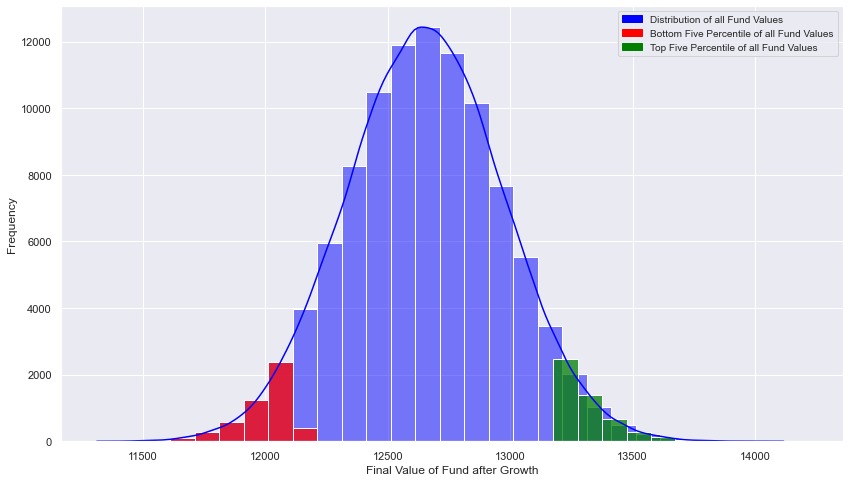

In [10]:
#final_df.to_csv('final_simulation_10000_200skew_0'+'.csv')
import seaborn as sns 
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
import matplotlib.patches as mpatches

final_df=initial_df
blue_patch = mpatches.Patch(color='blue', label='Distribution of all Fund Values')
green_patch=mpatches.Patch(color='green', label='Top Five Percentile of all Fund Values')
red_patch = mpatches.Patch(color='red', label='Bottom Five Percentile of all Fund Values')

#figure(figsize=(10, 6), dpi=80)

sns.set(rc={'figure.figsize':(14, 8)})
sns.set_style('ticks')
sns.set_style('darkgrid')
middle=final_df[(final_df['final_fund_sum']<final_df['final_fund_sum'].quantile(0.95))&(final_df['final_fund_sum']>final_df['final_fund_sum'].quantile(0.05))]

top_5=final_df[final_df['final_fund_sum']>final_df['final_fund_sum'].quantile(0.95)]
bottom_5=final_df[final_df['final_fund_sum']<final_df['final_fund_sum'].quantile(0.05)]

ax=sns.histplot(data=final_df, x="final_fund_sum",kde=True,binwidth=100,color='blue',stat='count',legend=True)
sns.histplot(data=top_5, x="final_fund_sum",binwidth=100,color='green',stat='count',legend=True)
sns.histplot(data=bottom_5, x="final_fund_sum",binwidth=100,color='red',stat='count')

ax.set(xlabel='Final Value of Fund after Growth',ylabel='Frequency')
ax.legend(prop={'size': 10 },handles=[blue_patch,red_patch,green_patch])

#ax.set(xticks=True)
plt.savefig('simulation_with_outliers_100000.pdf',bbox_inches='tight')


C:\Users\akhil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\akhil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='final_fund_sum', ylabel='Density'>

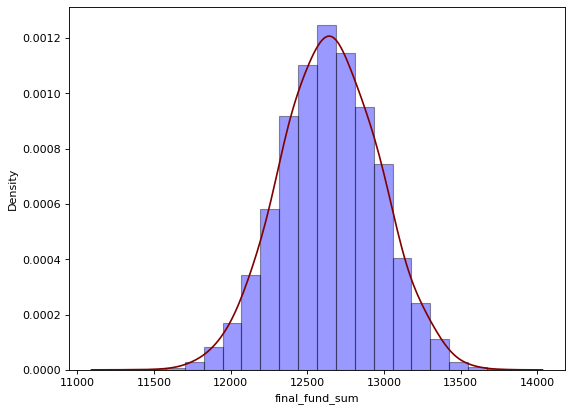

In [49]:
#final_df.final_fund_sum.hist()

figure(figsize=(8, 6), dpi=80)
#sns.histplot(data=final_df, x="final_fund_sum",kde=False,hist_kws,binwidth=100,color='blue')
#sns.kdeplot(data=final_df, x="final_fund_sum",color='red',stat='count')
sns.distplot(final_df['final_fund_sum'], kde_kws={'bw':0.25,'color':'maroon'}, hist_kws={'color':'blue','edgecolor':'black'},hist=True,bins=20)

In [11]:
final_df.to_pickle('final_simulation_100000.csv')

In [3]:
import gc


In [3]:
list_of_files=['final_simulation_100000_0.csv',
 'final_simulation_100000_1.csv',
 'final_simulation_100000_2.csv',
 'final_simulation_100000_3.csv',
 'final_simulation_100000_4.csv',
 'final_simulation_100000_5.csv',
 'final_simulation_100000_6.csv',
 'final_simulation_100000_7.csv',
 'final_simulation_100000_8.csv',
 'final_simulation_100000_9.csv',]

In [5]:
initial_df=pd.DataFrame()
for i in list_of_files:
    initial_df=initial_df.append(pd.read_csv(i),sort=False)


In [7]:
initial_df.to_csv('final_simulation.csv')